# Домашнее задание 9

(прислать до 02:00 14.04.2020)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 
Если возникает ошибка, то я сообщаю Вам об этом и жду исправленного решения, которое будет удовлетворять указанному требованию.

## Задача 1 (3 pts)

- (1 pts) Для задачи 

\begin{equation*}
\begin{split}
& \min x^2 + 1\\
\text{s.t. } & 2 \leq x \leq 4
\end{split}
\end{equation*}

найдите аналитически решение $x^*$. 
- (1 pts) Нарисуйте на одном графике $f_0(x) = x^2 + 1$ и $f_0(x) + t\phi(x)$, где $\phi(x)$ -  логарифмический барьер, для 4 значений $t > 0$, которые монотонно убывают к 0.
Покажите на графике $x^*(t)$ для каждого значения $t$.
- (1 pts) Постройте график $x^*(t)$ для $t \to 0$ и покажите, что он сходится к $x^*$

Задача выпуклая, так как целевая функция выпукла и ограничения типо неравенства задают выпуклое множетсво. Запишем условия ККТ:

$L(x, \mu_1,\mu_2) = x^2+1 + \mu_1(x-4) + \mu_2(2-x)$,

$\frac{\partial L}{\partial x} = 2x+\mu_1x-\mu_2x = 0$

$\mu_1(x-4) = 0, \mu_2(2-x) = 0$

$\mu_1 \geq 0, \mu_2 \geq 0$

$(x-4) \leq 0, (2-x) \leq 0$

1. $x = 2 \Rightarrow \mu_1 = 0, \mu_2 = 4$
2. $\mu_2 = 0 , \mu_1 = 0\Rightarrow x = 0$ - не подходит
3. $\mu_2 = 0, x = 4$ - не подходит

Получаем, что аналитическое решение задачи $x = 2.$

In [0]:
import numpy as np
from scipy.optimize import minimize_scalar

In [0]:
f = lambda x: x**2+1
g = lambda x,t: x**2+1 + (-t*np.log(x-2) -t*np.log(4-x))

In [0]:
X = np.linspace(2,4,100)
T = [0.01,0.1,1,10]

In [0]:
xs = []
for t in T:
    func= lambda x: x**2+1+(-t*np.log(x-2) -t*np.log(4-x))
    res = minimize_scalar(func, bounds=(2, 4), method='bounded')
    xs.append(res.x)

In [0]:
xs

[2.0024936582117268, 2.024394862185201, 2.201641238969924, 2.7436623090457752]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


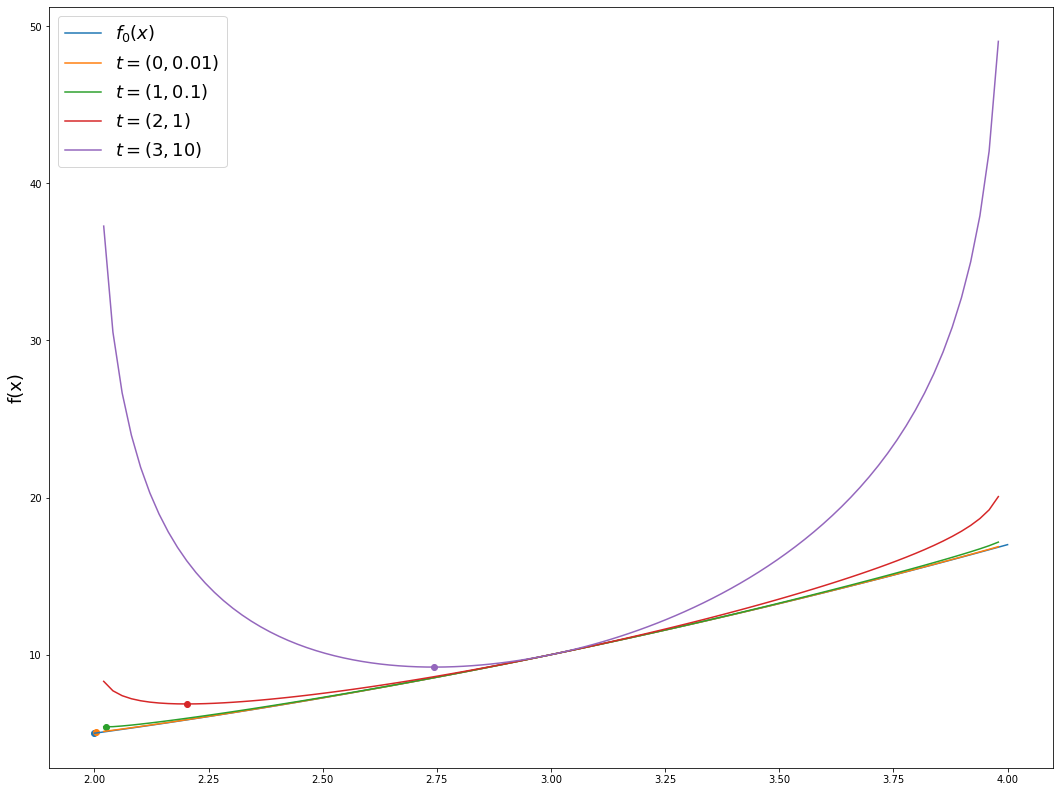

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,14))
plt.scatter(2,5)
plt.plot(X,f(X), label = r'$f_0(x)$')
for i in enumerate(T):
    plt.plot(X,g(X,i[1]), label = r'$t = {}$'.format(i))
    plt.scatter(xs[i[0]], g(xs[i[0]], i[1]))
plt.legend(loc="best", fontsize=18)
plt.ylabel("f(x)", fontsize=18)
plt.show()

## Задача 2 (5 pts)

Вместо логарифмического барьера можно использовать другие функции, аппроксимирующие $I_-(x)$.
В этой задаче предлагается проанализировать использование барьерной функции вида

$$
h(u) = -\frac{1}{u}.
$$ 

- (1 pts) Проверьте, будет ли выпукла "ограниченная" задача для барьера $h(u)$
- (2 pts) Получите выражения для двойственных переменных $\lambda^*(t)$ и $\mu^*(t)$ и зазора двойственности при использовании барьера $h(u)$
- (2 pts) Какими свойствами должна обладать барьерная функция, чтобы зазор двойственности зависел только от $m$ и $t$?

1. $f(x) = f_0(x) - \sum\limits_{i=1}^m \frac{t}{f_i(x)}.$ 

$\nabla^2 f(x) = \nabla^2f_0(x) + t\sum(\frac{\nabla^2 f_i(x)}{f^2_i(x)} - \frac{2\nabla f_i(x) \nabla f_i(x)^T}{(f_i(x))^3}).$ Если $x$ допустима в исходной задаче, то есть $f_i(x) \leq 0 ~\forall i$ и исходная задача является выпуклой, тогда $\nabla^2 f(x) \succ 0 \Rightarrow $ задача выпукла.
2. Условия оптимальности для ограниченной задачи:

- $f_i(x) \leq 0 ~ \forall i$

- $f'_0(x^*(t)) + t\sum\frac{f'_i(x^*(t))}{f^2_i(x^*(t))} + A^T\hat{\mu}= 0$.

Обозначим за $\lambda^*_i(t) = \frac{t}{f^2_i(x^*(t))}, \mu^* = \hat{\mu}$, получаем: $f_0'(x^*(t)) + \sum\lambda_i^*(t) f_i'(x^*(t)) + A^T\mu^*  = 0$, тогда $x^*(t)$ минимизирует лагранжиан $L = f_0(x) + \sum\lambda_i f_i(x) + \mu^T(Ax-b)$ при $\lambda_i = \lambda_i^*(t), \mu = \mu^*.$

Двойственная функция: $g(\lambda^*(t), \mu^*) = f_0(x^*(t)) + \sum \lambda_i^*(t)f_i(x^*(t)) + (\mu^*)^T(Ax^*(t)-b) = f_0(x^*(t)) - \sum\frac{t}{f_i(x^*(t))} \Rightarrow f_0(x^*(t)) - p^* \leq -\sum\frac{t}{f_i(x^*(t))}.$

3. Для того чтобы зазор двойственности зависил только от $m, t$ необходимо и достаточно условия $\lambda_i^*(t) \sim \frac{1}{f_i(x^*(t))} \Rightarrow \frac{h_i'(x)f_i(x)}{f'_i(x)} \sim const \Rightarrow h(x)$ должна быть логарифмом.

## Задача 3 (13 pts)

- (5 pts) Для следующей задачи
\begin{equation*}
\begin{split}
& \min_{x \in \mathbb{R}^n} \frac{1}{2} x^{\top}x + c^{\top}x \\
\text{s.t. } & Ax \leq b,
\end{split}
\end{equation*}
где $A \in \mathbb{R}^{m \times n}$ плотная матрица, предложите эффективный метод решения системы, возникающей в барьерном методе. Рассмотрите два случая $m \ll n$ и $n \ll m$.
Вам может пригодиться формула Шермана-Морисона-Вудбери.

- (5 pts) Реализуйте барьерный метод для этой задачи и покажите численно, что 
    - он работает для обоих случаев $m \ll n$ и $n \ll m$
    - методы решения линейных систем для каждого случая, которые Вы предложили в первом пункте действительно ускоряют решение задачи.
    
Матрицу $A$, а также вектора $b$ и $c$ инициализируйте случайным образом.
- (3 pts) Сравните время работы барьерного метода, метода проекции градиента и ускоренного проксимального градиентного метода для этой задачи, а также точность получаемого решения. Объясните полученные результаты.

$f(x) = \frac{1}{2}x^Tx + c^Tx -t \sum\log((Ax-b)_i) = \frac{1}{2}x^Tx + c^Tx -t \sum \log(a_i^Tx - b_i).$

$\nabla^2 f(x) = I + t\sum\frac{a_ia_i^T}{(a_ix - b_i)^2} = I+tA^TS^{-1}A, S = diag((a_1x - b_1)^2, (a_2x-b_2)^2,\dots, (a_nx-b_n)^2).$



Тогда по формуле Шермана-Морисона-Вудбери: $\nabla^2 f(x)^{-1} = I - tA^T(S+tAA^T)^{-1}A.$ Далее решаем задачу методом Ньютона, используя для обращения гессиана приведенную выше формулу.

- $m<<n$ : матрица $I+tA^TS^{-1}A \in R^{n \times n}, S+tAA^T \in R^{m \times m}.$ Очевидно, что обращать вторую проще, чем первую.
-  $n<<m$ : обращать исходный гессиан без использования формулы Шермана-Морисона-Вудбери проще.

In [0]:
!pip install git+https://github.com/amkatrutsa/liboptpy
        
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss
import liboptpy.constr_solvers as cs


  Cloning https://github.com/amkatrutsa/liboptpy to /tmp/pip-req-build-t5t2d6vq
  Running command git clone -q https://github.com/amkatrutsa/liboptpy /tmp/pip-req-build-t5t2d6vq
  Created wheel for liboptpy: filename=liboptpy-0.0.1-cp36-none-any.whl size=11730 sha256=e3fcfb9428ddd370d5c984b8d11edcd5315e47691755ac0055e26a338482e14f
  Stored in directory: /tmp/pip-ephem-wheel-cache-g08ruwly/wheels/8e/6e/38/60496dcf12f2c341e42d932d1403bdaaa17049556fdaba8d40
Successfully built liboptpy


In [0]:
import numpy as _np
from liboptpy import base_optimizer as _base

class BarrierNewtonMethod(_base.LineSearchOptimizer):
    def __init__(self, f, grad, hess, step_size, hess_inv = None, **kwargs):
        super().__init__(f, grad, step_size, **kwargs)
        self._hess = hess
        self._hess_inv = hess_inv
    
    def get_direction(self, x):
        grad = self._grad(x)

        if self._hess_inv:
            hess_i = self._hess_inv(x)
            h = -hess_i@grad
        else:
            hess = self._hess(x)
            h = _np.linalg.solve(hess, -grad)
        return h
    
    def get_stepsize(self):
        return self._step_size.get_stepsize(self._grad_mem[-1], self.convergence[-1], len(self.convergence))
    

In [0]:
t = 0.01

Сравним скорость работы методов в случае $m<<n$:

In [0]:
import numpy as np
m = 20
n = 2000
A = np.random.rand(m,n)
b = np.random.rand(m)
c = np.random.rand(n)

In [0]:
hess_inv = lambda x: np.eye(n)-t*A.T@np.linalg.inv(np.diag((A@x-b)**2)+t*A@A.T)@A
f = lambda x: 0.5*x.T@x+c.T@x-t*np.sum(np.log(A@x - b))
gradf = lambda x: x+c-t*np.sum(A/np.repeat(A@x-b,n).reshape(m,n), axis = 0)
x0 = np.random.rand(n)
hessf = lambda x: np.eye(n)+t*A.T@np.diag(1/(A@x-b)**2)@A

In [0]:
newton_inv = BarrierNewtonMethod(f, gradf, hessf, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.), hess_inv=hess_inv)
print('С использованием формулы Шермана-Морисона-Вудбери:') 
%timeit newton_inv.solve(x0, tol=1e-6, max_iter=500)


С использованием формулы Шермана-Морисона-Вудбери:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


1 loop, best of 3: 474 ms per loop


In [0]:
newton = BarrierNewtonMethod(f, gradf, hessf, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
print('С обычным обращением гессиана:')
%timeit newton.solve(x0, tol=1e-6, max_iter=500)

С обычным обращением гессиана:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


1 loop, best of 3: 3.34 s per loop


Явно видно, что метод с "умным" обращением гессиана работает сильно быстрее.


Рассмотрим теперь случай $m>>n$:


In [0]:
m = 2000
n = 20
A = np.random.rand(m,n)
b = np.random.rand(m)
c = np.random.rand(n)
hess_inv = lambda x: np.eye(n)-t*A.T@np.linalg.inv(np.diag((A@x-b)**2)+t*A@A.T)@A
f = lambda x: 0.5*x.T@x+c.T@x-t*np.sum(np.log(A@x - b))
gradf = lambda x: x+c-t*np.sum(A/np.repeat(A@x-b,n).reshape(m,n), axis = 0)
x0 = np.random.rand(n)
hessf = lambda x: np.eye(n)+t*A.T@np.diag(1/(A@x-b)**2)@A

In [0]:
newton_inv = BarrierNewtonMethod(f, gradf, hessf, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.), hess_inv=hess_inv)
print('С использованием формулы Шермана-Морисона-Вудбери:') 
%timeit newton_inv.solve(x0, tol=1e-6, max_iter=500)
newton = BarrierNewtonMethod(f, gradf, hessf, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
print('С обычным обращением гессиана:')
%timeit newton.solve(x0, tol=1e-6, max_iter=500)

С использованием формулы Шермана-Морисона-Вудбери:
1 loop, best of 3: 3.95 s per loop
С обычным обращением гессиана:
10 loops, best of 3: 114 ms per loop


Сравнение скорости работы:

In [0]:
import numpy as np
m = 20
n = 200
A = np.random.rand(m,n)
b = np.random.rand(m)
c = np.random.rand(n)
hess_inv = lambda x: np.eye(n)-t*A.T@np.linalg.inv(np.diag((A@x-b)**2)+t*A@A.T)@A
f = lambda x: 0.5*x.T@x+c.T@x-t*np.sum(np.log(A@x - b))
gradf = lambda x: x+c-t*np.sum(A/np.repeat(A@x-b,n).reshape(m,n), axis = 0)
x0 = np.random.rand(n)
hessf = lambda x: np.eye(n)+t*A.T@np.diag(1/(A@x-b)**2)@A

newton = BarrierNewtonMethod(f, gradf, hessf, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
x_newton = newton.solve(x0, tol=1e-6, max_iter=500, disp = True)

Convergence in 12 iterations
Function value = -7.675982561339615
Norm of gradient = 4.868019066413866e-09


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


In [0]:
eigvals = np.linalg.eigvalsh(A.T @ A)
L = np.max(eigvals)

In [0]:
def projection(y):
    return np.clip(y, 0, 1)

In [0]:
pg = cs.ProjectedGD(f, gradf, projection, ss.ConstantStepSize(1 / L))
x_pg = pg.solve(x0=x0, max_iter=200, tol=1e-10, disp=1)

Maximum iteration exceeds!
Convergence in 200 iterations
Function value = 48.233779538026305
Difference in function values = 0.1517230246062269
Difference in argument = 0.012264819593003472


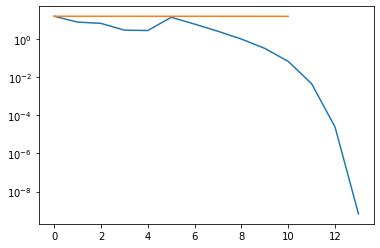

In [0]:
import matplotlib.pyplot as plt
plt.semilogy([np.linalg.norm(gradf(x)) for x in newton.get_convergence()], legend = 'Barrier')
plt.semilogy([np.linalg.norm(gradf(x)) for x in subgrad_m.get_convergence()], legend = 'PG')
plt.xlabel(r"iterations", fontsize=26)
plt.ylabel(r"$\|\nabla f\|$", fontsize=26)
plt.xticks(fontsize=20)
plt.legend(fontsize=26)
plt.yticks(fontsize=20)
plt.grid(True)

## Задача 4 (11 pts)

- (3 pts) Приведите следующую задачу к виду, который допускает применение барьерного метода

$$
\min_x \frac12 \|Ax - b\|_2^2 + \lambda \|x\|_1,
$$

где $A \in \mathbb{R}^{m \times n}$ и $m > n$.

- (5 pts) Сравните скорость работы барьерного метода для получившейся задачи и метода FISTA, которым решается задача в исходной форме.
Простройте график зависимости скорости работы методов от размерности задачи, то есть от размерности целевой переменной.
- (3 pts) Также сравните точность, с которой решаются задачи для различных $n$.

1. Приведем исходную задачу к виду: 
 $$\min_x \frac12 \|Ax - b\|_2^2 + \lambda u_i$$
$$-u_i \leq x_i \leq u_i, ~\forall i$$
2. Используем логарифмический барьер:
$$\min_x \frac12 \|Ax - b\|_2^2 + \lambda \sum u_i-t\sum\limits_{i=1}^nlog(u_i-x_i)-t\sum\limits_{i=1}^nlog(u_i+x_i)$$

$\nabla^2 f_x(x) = A^TA+diag(\frac{1}{(u_i-x_i)^2}+ \frac{1}{(u_i+x_i)^2})= A^TA + 2diag(\frac{(u_i^2+x_i^2)}{(u_i^2-x_i^2)^2}) = A^TA +D_1$.

$D_2 = -4diag(\frac{u_ix_i}{(u_i^2-x_i^2)^2}).$

$\nabla^2 f(x) = \left[
  \begin{array}{ccc}
     A^TA+ tD_1 & tD_2\\
       tD_2 &tD_1\\
  \end{array}
\right]$

In [0]:
m = 10
n = 100
t = 0.01
l = 0.01
eps = 0.001
A = np.random.rand(m,n)
b = np.random.rand(m)
x0 = np.random.rand(2*n)
def hess_f(y):
    x = y[:n]
    u = y[-n:]
    D_2 = -4*np.diag(u*x/((eps+u**2-x**2)**2))
    D_1 = 2*np.diag((u**2+x**2)/(eps+u**2-x**2)**2)
    hess_x = np.concatenate([A.T@A+t*D_1, t*D_2], axis = 1)
    U = np.concatenate([t*D_2,t*D_1], axis = 1)
    hess = np.concatenate([hess_x, U], axis = 0)
    return hess+ np.full_like(hess, 0.001)

def f(y):
    return 0.5*np.linalg.norm(A@y[:n]-b)**2+np.sum(l*y[-n:]) - t*np.sum(np.log(y[-n:] - y[:n])) - t*np.sum(np.log(y[-n:] + y[:n]))

def grad_f(y):
    grad_x = A.T@(A@y[:n] - b)+2*t*y[:n]/(y[-n:]**2-y[:n]**2)
    grad_u = l*np.ones(n)-2*t*y[-n:]/(y[-n:]**2-y[:n]**2)

    return np.concatenate([grad_x, grad_u], axis = 0)

In [0]:
def StepNewton(f, grad_f, hess_f, x, tol, max_iter):
    iters = 0
    alpha = 0.5
    while True:
        x_ = x.copy()
        gradient = grad_f(x_)
        hess = hess_f(x_)
        h = np.linalg.solve(hess, - gradient)
        x_ = x_ + alpha * h
        iters += 1
        if np.linalg.norm(grad_f(x_)) < tol:
            break
        if iters >= max_iter:
            break
    return x_


def BarrierSolver(f, grad_f, hess_f, x0, t, rho = 0.9, tol=1e-6, max_iter=500):
    x = x0.copy()
    n = x0.shape[0]
    conv = []
    iters = 0
    while True:
        conv.append(x)
        iters += 1
        res = StepNewton(f, grad_f, hess_f, x, tol = 1e-4, max_iter = 1000)
        x = res.copy()
        if n*t< tol:
            break
        if iters == max_iter:
            break
        t = t* rho
    return conv

In [0]:
conv = BarrierSolver(f, gradf, hessf, x0, 5, 0.5, tol=1e-1, max_iter=200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


In [0]:
[np.linalg.norm(grad_f(x)) for x in conv]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square


[1170.0778467264681,
 585.4724604649492,
 293.3977518574421,
 147.13269298393064,
 74.1455816426678,
 37.17005870930668,
 18.701477926112805,
 9.504403449548489,
 4.9063535839005015,
 2.7931614461627294,
 43.647428641640246,
 21.113512112529722,
 14.63140297559295,
 10.92472714580217,
 12.723379315432542]

Мой метод не работает, я , к сожалению, не могу найти ошибку.